# Анализ данных для авиакомпании 

Для анализа использовались данные о моделях самолета, количестве рейсов для каждой модели, городах и количестве рейсов в города.

**Задача** - изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
**Цель**: понять предпочтения пользователей, покупающих билеты на те или иные направления.

### План работы над проектом
1. [Импорт и предобработка данных](#step1); 
3. [Исследовательский анализ данных](#step2);
5. [Общий вывод](#step3).

<div id='step1'/>

### 1. Импорт и предобработка данных 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avia_model_data = pd.read_csv('query_1.csv')
avia_city_data = pd.read_csv('query_3.csv')

In [3]:
def standart_opening(data):
    data.info()
    print('--------------------------------------')
    print('Дубликаты:')
    print (data.duplicated().sum(), 'дубликатов')
    print('--------------------------------------')
    print('Пропуски:')
    print (data.isna().mean())
    print('--------------------------------------')
    print('Начало таблицы')
    print (data.head())
    print('--------------------------------------')
    print('Конец таблицы')
    print (data.tail())
    print('--------------------------------------')
    print()

standart_opening(avia_model_data)
standart_opening(avia_city_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
--------------------------------------
Дубликаты:
0 дубликатов
--------------------------------------
Пропуски:
model             0.0
flights_amount    0.0
dtype: float64
--------------------------------------
Начало таблицы
             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300
--------------------------------------
Конец таблицы
                 model  flights_amount
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan   

Пропусков и дубликатов в таблице нет, типы данных выглядят достоверно. 

Пропусков и дубликатов в этой таблицах нет. Я хочу округлить средние значения в столбце `'average_flights'` и привести данные в к целочисленному формату. 

In [4]:
avia_city_data.round() 
avia_city_data['average_flights'] = avia_city_data['average_flights'].astype('int')
avia_city_data.dtypes

city               object
average_flights     int32
dtype: object

In [5]:
avia_city_data.head()

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


Я убедилась, что в даннх нет дубликатов и пропусков, округлила знанчения в столбце со средним количеством полетов и привела его к типу целых чисел. 

<div id='step2'/>

### Исследовательский анализ

Получим список самых популярных городов:

In [6]:
avia_city_data.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Построим и проанализируем графики по моделям самолетов и количеству рейсов:

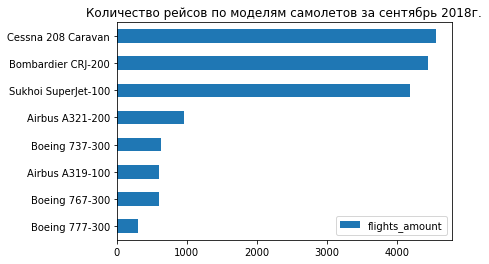

In [7]:
fig, ax = plt.subplots()
avia_model_data.sort_values(by='flights_amount').plot(kind='barh', x='model', y='flights_amount', ax = ax)
ax.set(title='Количество рейсов по моделям самолетов за сентябрь 2018г.', xlabel=None, ylabel=None);

На внтуренних рейсах чаще всего используются 3 модели самолетов: Cessna 208 Caravan, Bombardier CRJ-200 и 
Sukhoi SuperJet-100 - они совершили за сентябрь 2018 года более 4000 рейсов каждый. Остальные 5 летают как минимум в 4 раза реже. 

- Города и количество рейсов

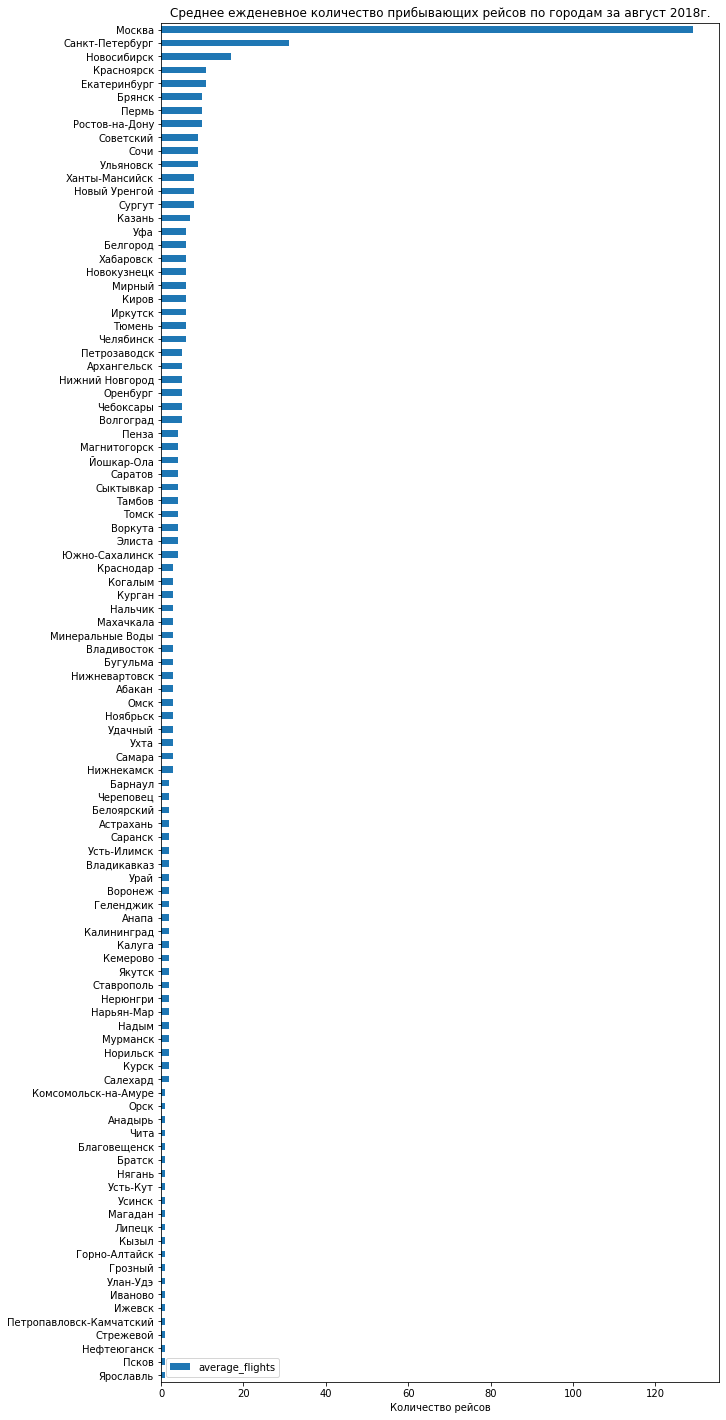

In [8]:
fig, ax = plt.subplots(figsize=(10, 25))
avia_city_data.sort_values(by='average_flights').plot(kind='barh', x='city', y='average_flights', ax = ax)
ax.set(title='Среднее ежденевное количество прибывающих рейсов по городам за август 2018г.', 
       xlabel='Количество рейсов', ylabel=None);

График наглядно иллюстрирует, что город, принимающий, максимальное количество рейсов еждедневно - Москва. Санкт-Петербург - на втором месте, хотя количество прибывающих рейсов F9 там в 4 раза ниже, Новосибирск - на 3м месте. Дальше идет плавное снижение. В целом можно сказать, что большая часть городов принимает не более 10 рейсов в день, но не менее одного.

- Топ-10 городов и количество рейсов

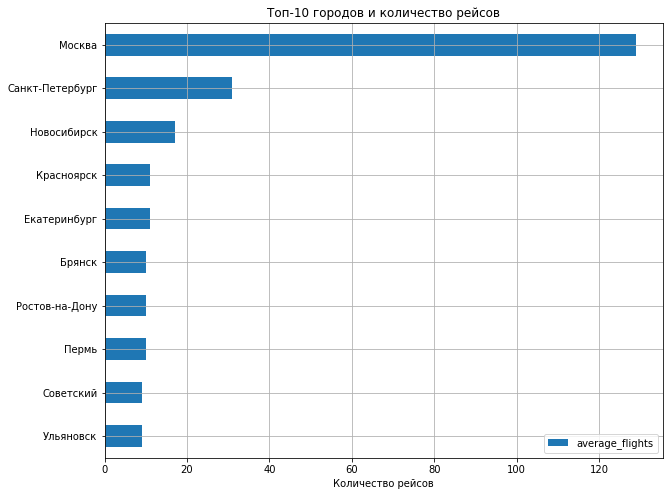

In [9]:
top10_city_data = avia_city_data.sort_values(by='average_flights', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 8))
top10_city_data.sort_values(by='average_flights').plot(kind='barh', x='city', y='average_flights', ax = ax, grid=True)
ax.set(title='Топ-10 городов и количество рейсов', xlabel='Количество рейсов', ylabel=None);

В десятку самых популярных городов, кроме Москвы и Санкт-Петербурга, вошли Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск. Все они - крупные региональные центры, но количество ежедневных рейсов в августе в них не превышало 20. А если не считать Москвы, СПб и Новосибирска, то среднее количество ежедневно прибывавших рейсов в авгуте среди самых популярных городов  - 10. 

<div id='step3'/>

## Общий вывод

#### Задача: иузчить два датасета с результатами запросов, построить и проанализировать графики. 
#### Цель: понять предпочтения пользователей, покупающих билеты на те или иные направления. 
---
Перед началом работы я проверила данные на предмет пропусков и дубликатов. Для удобства восприятия, я округлила и привела к целочисленному формату значения в таблице с городами. Там было указано среднее количество рейсов, прилетавших ежедневно в указанные города в августе 2018г. 

#### Исследовательский анализ:

- Модели самолетов и количество рейсов:

На внтуренних рейсах чаще всего используются 3 модели самолетов: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 - они совершили за сентябрь 2018г. более 4000 рейсов каждый.

- Города и количество рейсов:

Самый популярный город, принимавший в августе 2018г. по 129 рейсов ежедневно, - Москва. Санкт-Петербург - на втором месте, хотя количество рейсов F9 там в 4 раза ниже (31), Новосибирск - на 3м (17). В целом можно сказать, что большая часть городов из списка принимала в августе 2018г. от одного до 10 рейсов в день.

- Топ-10 городов и количество рейсов:

В топ-10 городов, кроме Москвы и Санкт-Петербурга, вошли Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск. Все они - крупные региональные центры, но количество ежедневных рейсов в августе 2018г. в них не превышало 20. А если не считать Москвы, СПб и Новосибирска, то среднее количество ежедневно прибывавших рейсов среди самых популярных городов - 10.

##### На основании проделанного анализа можно сделать вывод, что наиболее популярные направления у пассажиров – это Москва и Санкт-Петербург. Также пользуются спросом билеты в крупные региональные центры. 
